# Des Données sur les Accidents de la route 

## Présentation du projet

Dans le cadre du projet SD 701 nous souhaitons analyser une base de données des accidents corporels de la circulation routières. 
En appliquant différentes méthodes de DataMining sur un ensemble de jeux de données relatifs aux accidents de la route nous souhaitons déterminer les facteurs qui influencent la gravité d’un accident. 
Le contexte de l’étude pourrait être la suivante : 
Il s’avère que la plupart des personnes impliquées dans un accident de la route ne sont pas blessés ou ne présentent que des blessures artificielles. Cependant, il se peut que des personnes gravement blessées nécessitent une prise en charge à l’hôpital. Dans une situation de crise sanitaire, où tous les hôpitaux se retrouvent en surcharge de patients, il peut être utile de diminuer les accidents graves admis en soins intensifs. Pour ce faire, une campagne de prévention s’appuyant sur les facteurs influençant la gravité pourrait aider a diminuer le nombre d’accidents graves. 
Pour connaître les facteurs influençant la gravité d’un accident, l’option retenu serait de diminuer la probabilité qu’une personne ait un accident sachant que cette dernière à déjà eu un accident. (Formule de Bayes). En ce sens connaître les facteurs influençant la gravité des accidents permettraient des diminuer la probabilité qu’une personne soit hospitalisée. 


## Objectif

L'objectif de ce projet est de déterminer les facteurs influençant la gravité des accidents. Sur la base de cette analyse l’agence régional de santé pourra alors fixer les orientations de sa future campagne nationale de lutte contre les accidents de la route. 

## Présentation du Dataset

Pour chaque accident corporel (soit un accident survenu sur une voie ouverte à la circulation publique, impliquant au moins un véhicule et ayant fait au moins une victime ayant nécessité des soins), des saisies d’information décrivant l’accident sont effectuées par l’unité des forces de l’ordre (police, gendarmerie, etc.) qui est intervenue sur le lieu de l’accident. Ces saisies sont rassemblées dans une fiche intitulée bulletin d’analyse des accidents corporels. L’ensemble de ces fiches constitue le fichier national des accidents corporels de la circulation dit " Fichier BAAC1" administré par l’Observatoire national interministériel de la sécurité routière "ONISR". Les bases de données, extraites du fichier BAAC, répertorient l'intégralité des accidents corporels de la circulation intervenus durant une année précise en France métropolitaine ainsi que les départements d’Outre-mer (Guadeloupe, Guyane, Martinique, La Réunion et Mayotte depuis 2012) avec une description simplifiée. Cela comprend des informations de localisation de l’accident, telles que renseignées ainsi que des informations concernant les caractéristiques de l’accident et son lieu, les véhicules impliqués et leurs victimes.

Description des bases de données annuelles des accidents corporels de la circulation routière - Années de 2005 à 2018

Source Dataset : **data.gouv.fr** (ministère de l’intérieur)

•	https://www.data.gouv.fr/fr/datasets/bases-de-donnees-annuelles-des-accidents-corporels-de-la-circulation-routiere-annees-de-2005-a-2019/

Notre base de données est composée de **4** fichiers csv :

- **Caractéristique.csv** (58441 lignes) 
Décrit les circonstances générales de l’accident (types de collisions, luminosité, date)


- **Lieux.csv** (58441 lignes)
Décrit le lieu principal de l’accident (catégorie route, nb de voies, régime de circulation, surface de la chaussée,…)


- **Véhicules.csv** (100711 lignes)
Décrit les véhicules impliqués dans l’accident (n° plaque immatriculations, type de véhicule, localisation du choc, manœuvre,…)


- **Usagers.csv** (132978 lignes)
Décrit les usagers impliqués dans l’accident (place de l’usager dans le véhicule, gravité, trajet de l’usager,…)

Chacune des variables contenues dans une rubrique est reliée aux variables des autres rubriques. Le n° d'identifiant de l’accident (Cf. **_Num_Acc_**) présent dans ces 4 rubriques permet d'établir un lien entre toutes les variables qui décrivent un accident. Quand un accident comporte plusieurs véhicules, il est également possible de relier chaque véhicule à ses occupants. Ce lien est fait par la variable **_Num_veh_**.


### Etape : 0 Importation des données

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

carac = pd.read_csv('dataset/caracteristiques-2019.csv', sep=';')
lieux = pd.read_csv('dataset/lieux-2019.csv', sep=';')
usag = pd.read_csv('dataset/usagers-2019.csv', sep=';')
vehic = pd.read_csv('dataset/vehicules-2019.csv', sep=';')


### Etape 1 : Visualisation des dimensions des Dataframes

In [2]:
print("")
print("dimension de la table caracteristiques :", carac.shape[0], "lignes et", carac.shape[1], "colonnes")
print("")
print("dimension de la table lieux :", lieux.shape[0], "lignes et", lieux.shape[1], "colonnes")
print("")
print("dimension de la table usagers :", usag.shape[0], "lignes et", usag.shape[1], "colonnes")
print("")
print("dimension de la table vehicules :", vehic.shape[0], "lignes et", vehic.shape[1], "colonnes")


dimension de la table caracteristiques : 58840 lignes et 15 colonnes

dimension de la table lieux : 58840 lignes et 18 colonnes

dimension de la table usagers : 132977 lignes et 15 colonnes

dimension de la table vehicules : 100710 lignes et 11 colonnes


#### Visualisation du dataset "Caracteristiques.csv"
Décrit les circonstances générales de l’accident (types de collisions, luminosité, date)

In [3]:
carac.head()

,Num_Acc,jour,mois,an,hrmn,lum,dep,com,agg,int,atm,col,adr,lat,long
0,201900000001,30,11,2019,01:30,4,93,93053,1,1,1,2,AUTOROUTE A3,"48,8962100","2,4701200"
1,201900000002,30,11,2019,02:50,3,93,93066,1,1,1,6,AUTOROUTE A1,"48,9307000","2,3688000"
2,201900000003,28,11,2019,15:15,1,92,92036,1,1,1,4,AUTOROUTE A86,"48,9358718","2,3191744"
3,201900000004,30,11,2019,20:20,5,94,94069,1,1,1,4,A4,"48,8173295","2,4281502"
4,201900000005,30,11,2019,04:00,3,94,94028,1,1,1,2,A86 INT,"48,7763620","2,4332540"


#### Visualisation du dataset "lieux.csv"
Décrit le lieu principal de l’accident (catégorie route, nb de voies, régime de circulation, surface de la chaussée,…)

In [4]:
lieux.head()

,Num_Acc,catr,voie,v1,v2,circ,nbv,vosp,prof,pr,pr1,plan,lartpc,larrout,surf,infra,situ,vma
0,201900000001,1,3,0.0,NaN,3,10,0,1,6,900,2,NaN,NaN,1,2,1,70
1,201900000002,1,1,0.0,NaN,1,2,0,4,3,845,2,NaN,NaN,1,0,1,70
2,201900000003,1,86,0.0,NaN,3,8,0,1,10,500,3,NaN,NaN,1,0,1,90
3,201900000004,1,4,0.0,NaN,3,5,0,1,2,299,1,NaN,NaN,1,0,1,90
4,201900000005,1,86,0.0,INT,1,3,0,1,41,0,3,NaN,NaN,1,2,1,90


#### Visualisation du dataset "vehicules.csv"
Décrit les véhicules impliqués dans l’accident (n° plaque immatriculations, type de véhicule, localisation du choc, manœuvre,…)

In [5]:
vehic.head()

,Num_Acc,id_vehicule,num_veh,senc,catv,obs,obsm,choc,manv,motor,occutc
0,201900000001,138 306 524,B01,2,7,0,2,5,23,1,NaN
1,201900000001,138 306 525,A01,2,17,1,0,3,11,1,NaN
2,201900000002,138 306 523,A01,1,7,4,0,1,0,1,NaN
3,201900000003,138 306 520,A01,1,7,0,2,1,2,1,NaN
4,201900000003,138 306 521,B01,1,7,1,0,4,2,1,NaN


#### Visualisation du dataset "usagers.csv"
Décrit les usagers impliqués dans l’accident (place de l’usager dans le véhicule, gravité, trajet de l’usager,…)

In [6]:
usag.head()

,Num_Acc,id_vehicule,num_veh,place,catu,grav,sexe,an_nais,trajet,secu1,secu2,secu3,locp,actp,etatp
0,201900000001,138 306 524,B01,2,2,4,2,2002,0,1,0,-1,-1,-1,-1
1,201900000001,138 306 524,B01,1,1,4,2,1993,5,1,0,-1,-1,-1,-1
2,201900000001,138 306 525,A01,1,1,1,1,1959,0,1,0,-1,-1,-1,-1
3,201900000002,138 306 523,A01,1,1,4,2,1994,0,1,0,-1,-1,-1,-1
4,201900000003,138 306 520,A01,1,1,1,1,1996,0,1,0,-1,-1,0,-1


##### Note : La variable commune à nos données est : _Num_Acc_

### Etape 3 : Construction d'un unique Dataframe

Durant cette étape 3 nous souhaitons concaténer nos 4 dataframes (carac, lieux, vehic et usag) au sein d'un unique dataframe.

La variable Num_Acc nous donne les informations nécessaires sur le nombre d'individus impliqués dans l'accident. Il s'agit donc de la variable commune à nos 4 Dataframes. Par conséquent nous allons "merger" nos 4 dataframes à l'aide de cette variable.

Les Dataframes "carac" et "lieux" ont la même dimension (58440 lignes). De plus à chacune des lignes de données de ces derniers y est assigné un numéro d'accident (Num_Acc) qui est unique. En revanche pour les Dataframes "vehic" et "usag" ont des dimensions bien supérieures au 2 Dataframes précédents (100710, 132977 respectivement) Le travail durant cette phase consistera a ramener les dimensions Dataframes "vehic" et "usag" aux dimensions des 2 Dataframes "carac" et "lieux".

#### 3.1/ Pré-traitement des données du Dataframe _usag_ et _vehic_

- Suppression des variables non pertinentes dans notre sujet d'étude


- Statistique descriptive à l'aide de visualisation (histogrammes) utile pour la sélection de variable


- Redimensionnement du dataframe pour le ramener à 58440 lignes en effectuant une sélection des variables


- Gestion des valeurs manquantes


- Réencodage des variables 

Dans le cadre de notre étude nous ne nous intéresserons pas aux variables **_id_vehicule_** et **_num_veh_** . Le **_Num Acc_** nous donne les informations nécessaires sur le nombre d'individus impliqués dans l'accident. 
<br> <br> 

L'étude porte sur les circonstances de l'accident des véhicules, par conséquent nous nous ne nous intéresserons pas non plus aux variables concernant la localisation (**_locp_**) et l'action du pièton (**_actp_**) pendant l'accident ainsi que la variable indiquant si le piéton accidenté est accompagné ou non (**_etatp_**). De plus pour des raisons évidentes d'éthiques la variables (**_sexe_**) ne sera pas conservée.


Par ailleurs la variable permettant de situer la place occupée dans le véhicule par l'usager au moment de l'accident (**_place_**) est redondante avec la variable qui indique la catégorie de l'usager (conducteur, passager, piéton,...). **_catu_** de notre Dataframe. Ainsi druant notre analyse nous uniquement la variable **_catu_** la variable **_place_** sera retirée du Dataframe.

### Début du pré-traitement du Dataframe _Usag_

- La variable **_Num_vehicul_** rempli déjà la fonction de des deux variables **_id_vehicule_** et **_num_veh_**. Les variables **_id_vehicule_** et **_num_veh_** sont donc retirées du dataset 
- Dans cette étude nous nous n'interessons pas à la localisation du pièton, les variables **_locp_** , **_actp_** et **_etatp_** sont donc retirées du dataset
- Pour des raison d'éthique nous ne gardons pas la variable **_sexe_**
- Au sujet de la variable **_place_** , la variables **_catu_** nous donne déjà les renseignements suffisant. La variable **_place_** est donc retirée du dataset

In [7]:
# Suprression des variable inutiles

usag.drop(['id_vehicule', 'num_veh'], inplace=True, axis=1)
usag.drop(['locp', 'actp', 'etatp'], inplace=True, axis=1)
usag.drop(['sexe'], inplace=True, axis=1)
usag.drop(['place'], inplace=True, axis=1)

In [8]:
usag

,Num_Acc,catu,grav,an_nais,trajet,secu1,secu2,secu3
0,201900000001,2,4,2002,0,1,0,-1
1,201900000001,1,4,1993,5,1,0,-1
2,201900000001,1,1,1959,0,1,0,-1
3,201900000002,1,4,1994,0,1,0,-1
4,201900000003,1,1,1996,0,1,0,-1
...,...,...,...,...,...,...,...,...
132972,201900058837,1,4,1988,1,1,0,-1
132973,201900058838,1,4,1998,9,1,0,-1
132974,201900058839,1,3,1979,0,2,0,-1
132975,201900058840,1,4,1974,0,1,0,-1


#### Analyse du nombre de valeur maquante avant traitement de la table _usag_

In [9]:
for i in usag.columns.tolist():
    print("")
    print("Il y a",usag[i].isnull().sum(axis = 0),"valeurs manquantes dans la variable",i,"(soit",round(usag[i].isnull().sum(axis = 0)/usag.shape[0],4)*100,"%) ")


Il y a 0 valeurs manquantes dans la variable Num_Acc (soit 0.0 %) 

Il y a 0 valeurs manquantes dans la variable catu (soit 0.0 %) 

Il y a 0 valeurs manquantes dans la variable grav (soit 0.0 %) 

Il y a 0 valeurs manquantes dans la variable an_nais (soit 0.0 %) 

Il y a 0 valeurs manquantes dans la variable trajet (soit 0.0 %) 

Il y a 0 valeurs manquantes dans la variable secu1 (soit 0.0 %) 

Il y a 0 valeurs manquantes dans la variable secu2 (soit 0.0 %) 

Il y a 0 valeurs manquantes dans la variable secu3 (soit 0.0 %) 


#### Statistiques Descriptives 

**Construction des histogrammes pour les variables**

- _catu_ 
- _grav_ 
- _sexe_ 
- _trajet_ 
- _secu1_ 
- _secu2_ 
- _secu3_

#### Statistiques Descriptives : Histogrammes des variables de la table _usag_

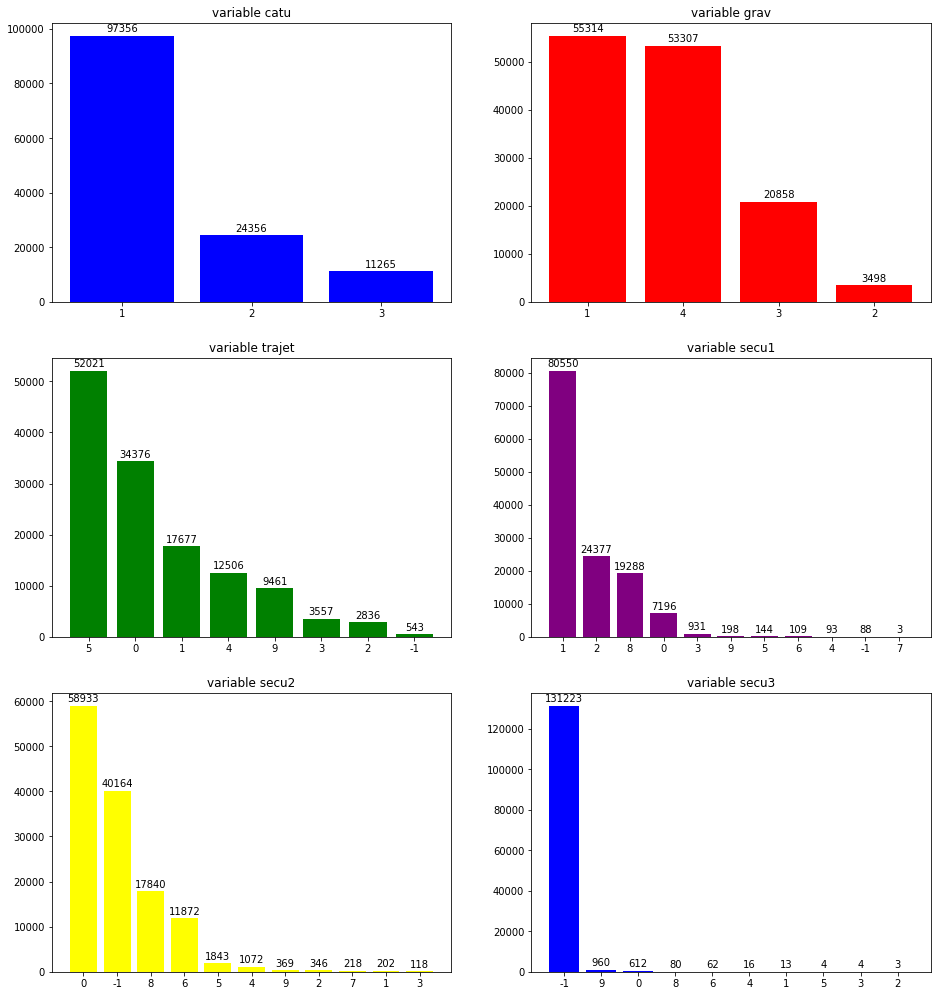

In [10]:

def cm_to_inch(value):
    return value/2.54

plt.figure(figsize=(cm_to_inch(40), cm_to_inch(60)));

def histo(variable, pos, couleur):

    xi = [str(x) for x in usag[variable].value_counts().index.tolist()];
    yi = usag[variable].value_counts().tolist();

    plt.subplot(4,2,pos);
    plt.bar(xi,yi, color=couleur);
    for x,y in zip(xi,yi): plt.annotate("{:.0f}".format(y),(x,y),textcoords="offset points",xytext=(0,4), ha='center')  
    plt.title("variable "+variable)

histo('catu', 1, 'blue')
histo('grav', 2, 'red')
histo('trajet', 3, 'green')
histo('secu1', 4, 'purple')
histo('secu2', 5, 'yellow')
histo('secu3', 6, 'blue')

plt.show();

### Transformation/recodage des variables de la table _usag_

#### Table _usag_  : Ré-encodage de la variable _catu_

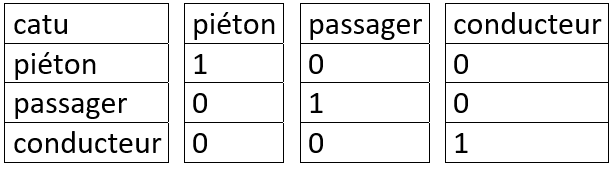

Ceci est exemple d'une technique de re-encodage que nous utiliserons par la suite dans ce notebook. Il s'agit de la technique du one hot encoding.

In [11]:
liste_catu = usag.catu.unique().tolist()
dict_catu = dict(zip(liste_catu , ["passager","conducteur", "piéton"]))

for i in liste_catu : 
    usag.loc[usag['catu'] == i, dict_catu[i]] = 1
    usag.loc[usag['catu'] != i, dict_catu[i]] = 0
    usag[dict_catu[i]] = usag[dict_catu[i]].astype(int)
usag =  usag.drop('catu', 1)

<ipython-input-11-f69c610d67e0>:8: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  usag =  usag.drop('catu', 1)


#### Table _usag_  : Ré-encodage de la variable _trajet_

Sur l'histogramme on constate que la valeur "5" qui correspont à l"attribut "promenade-loisirs" est prépondérante par rapport aux autres valeurs possibles pour la variable **_trajet_**. Par conséquent nous avons décidé de réencoder la variable par la variable binaire **_promenda_loisir_**.

Valeurs possibles par la nouvelle variable binaire **_promenade_loisir_** : 

- Si **_trajet_** à pour valeur **"5"** => **_promenade_loisir_** = **1**
- **0** sinon

In [12]:
liste_trajet = usag.trajet.unique().tolist()

for i in liste_trajet : 
    usag.loc[usag['trajet'] == 5, 'promenade_loisir'] = 1
    usag.loc[usag['trajet'] != 5, 'promenade_loisir'] = 0
    usag['promenade_loisir'] = usag['promenade_loisir'].astype(int)
usag = usag.drop('trajet', 1)

<ipython-input-12-1c1f01341d13>:7: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  usag = usag.drop('trajet', 1)


#### Table _usag_  : Ré-encodage de la variable _grav_

De manière analogue au ré-encodage de la variable **_trajet_** nous ré-encondons la variable **_grav_** par une variable binaire **_grave_ou_decede_**:

Valeurs possibles par la nouvelle variable binaire **_grave_ou_decede_** : 

- Si **_grav_** à pour valeur **"2"** ou **"3"** => **_grave_ou_decede_** = **1**
- Si **_grav_** à pour valeur **"1"** ou **"4"** => **_grave_ou_decede_** = **0**

In [13]:
liste_grav = usag.grav.unique().tolist()

for i in liste_grav : 
    usag.loc[usag['grav'] == 2 , 'grave_ou_decede'] = 1
    usag.loc[usag['grav'] == 3 , 'grave_ou_decede'] = 1
    usag.loc[usag['grav'] == 1 , 'grave_ou_decede'] = 0
    usag.loc[usag['grav'] == 4 , 'grave_ou_decede'] = 0
    usag['grave_ou_decede'] = usag['grave_ou_decede'].astype(int)
usag = usag.drop('grav', 1)

<ipython-input-13-411fa69578c5>:9: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  usag = usag.drop('grav', 1)


#### Table _usag_  : Ré-encodage de la variable _an_nais_

Pour le ré-encodage de cette variable, nous créons 4 catégories d'âge qui sont les suivantes : 

- **_mineur_** : âge < 18 ans
- **_adulte_** : âge compris entre 18 et 30 ans
- **_senior_** : âge compris entre 31 et 60 ans
- **_senior_plus_** : âge > 60 ans

In [14]:
usag.loc[usag['an_nais'] < 18 , 'mineur'] = 1
usag.loc[usag['an_nais'] >= 18 , 'mineur'] = 0
usag['mineur'] = usag['mineur'].astype(int)

usag.loc[(usag['an_nais'] >= 18) & (usag['an_nais'] < 31), 'adulte'] = 1
usag.loc[usag['an_nais'] >= 31 , 'adulte'] = 0
usag.loc[usag['an_nais'] < 18 , 'adulte'] = 0
usag['adulte'] = usag['adulte'].astype(int)

usag.loc[(usag['an_nais'] >= 31) & (usag['an_nais'] < 61), 'senior'] = 1
usag.loc[usag['an_nais'] >= 61 , 'senior'] = 0
usag.loc[usag['an_nais'] < 31 , 'senior'] = 0
usag['senior'] = usag['senior'].astype(int)

usag.loc[usag['an_nais'] >= 61 , 'senior_plus'] = 1
usag.loc[usag['an_nais'] < 61 , 'senior_plus'] = 0
usag['senior_plus'] = usag['senior_plus'].astype(int)

usag = usag.drop('an_nais', 1)

<ipython-input-14-5b1f634385b7>:19: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  usag = usag.drop('an_nais', 1)


#### Table _usag_  : Ré-encodage des variables : 


- **_secu1_** : 

Pour la variable **_secu1_** convertissons les valeurs : **(i.e -1 "non renseigné")**, **0 (i.e"aucun équipement")**, **8 (i.e "non déterminé")** --> en **0**.
De plus, on recode les valeurs de la variable pour afficher un 1 s'il y a un équipement

- **_secu2_** : 

De manière analogue au ré-encodage de la variable **_secu1_**, pour la variable **_secu2_** convertissons les valeurs : **-1 (i.e "non renseigné")**, **0 (i.e "aucun équipement")**, **8 (i.e "non déterminé")** --> en **0**.
De plus, on recode les valeurs de la variable pour afficher un 1 s'il y a un équipement


- **_secu3_**

Au regard de la disbritution de cette variable par l'histogramme cette variable ne sera retenue. La valeurs **"-1"** prend très largement le dessus sur les autre valeurs de cette variable qui plus est la valeur **"-1"** correspond à l'attribut **"Non renseigné"** du notre jeu de données. On ne peut donc tirer aucune connaissance à partir de cette variable.


#### On rejète la variable **_secu3_**

In [15]:
usag = usag.drop('secu3', 1)

<ipython-input-15-b4ab8899b772>:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  usag = usag.drop('secu3', 1)


#### Nous conversissons la variable les valeurs de la variable _secu1_ : <br>  -1 (i.e non renseigné), 0 (i.e aucun équipement), 8 (i.e non déterminé) => en 0

In [16]:
usag.loc[(usag.secu1 == -1) | (usag.secu1 == 0) | (usag.secu1 == 8), 'secu1'] = 0

#### On recode les valeurs de la variable _secu1_ pour afficher un 1 s'il y a un équipement

In [17]:
liste_secu1 = usag.secu1.unique().tolist()

for i in liste_secu1 : 
    usag.loc[usag['secu1'] != 0 , 'secu1'] = 1
    usag['secu1'] = usag['secu1'].astype(int)

#### Pour la variable _secu2_ convertissons les valeurs : <br> -1 (i.e non renseigné), 0 (i.e aucun équipement), 8 (i.e non déterminé) => en 0

In [18]:
usag.loc[(usag.secu2 == -1) | (usag.secu2 == 0) | (usag.secu2 == 8), 'secu2'] = 0

#### On recode les valeurs de la variable _secu2_ pour afficher un 1 s'il y a un équipement

In [19]:
liste_secu2 = usag.secu2.unique().tolist()

for i in liste_secu2 : 
    usag.loc[usag['secu2'] != 0 , 'secu2'] = 1
    usag['secu2'] = usag['secu2'].astype(int)

#### Afin de connaître le nombre d'équipement de sécurité par individus dans l'accident, nous additionnons les deux variables _secu1_, _secu2_

In [20]:
usag['secu'] = usag.secu1 + usag.secu2
usag = usag.drop('secu1', 1)
usag = usag.drop('secu2', 1)

<ipython-input-20-bd399c6916b1>:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  usag = usag.drop('secu1', 1)
<ipython-input-20-bd399c6916b1>:3: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  usag = usag.drop('secu2', 1)


#### Nous Sommons (avec un group_by) chaque ligne pour obtenir les mêmes dimensions que les Dataframe _carac_ et _lieux_ (58 840 lignes)

In [21]:
usag = usag.groupby(by=['Num_Acc']).sum()

In [22]:
usag = usag.reset_index()

In [23]:
print("Maintenant il y ",usag.shape[0],"lignes et ",usag.shape[1],"colonnes dans la table usag")

Maintenant il y  58840 lignes et  11 colonnes dans la table usag


### Fin du pré-traitement du Dataframe _usag_

### Début du pré-traitement du Dataframe _vehic_

### Visualisons la variable **_vehic_**

In [24]:
vehic.head(5)

,Num_Acc,id_vehicule,num_veh,senc,catv,obs,obsm,choc,manv,motor,occutc
0,201900000001,138 306 524,B01,2,7,0,2,5,23,1,NaN
1,201900000001,138 306 525,A01,2,17,1,0,3,11,1,NaN
2,201900000002,138 306 523,A01,1,7,4,0,1,0,1,NaN
3,201900000003,138 306 520,A01,1,7,0,2,1,2,1,NaN
4,201900000003,138 306 521,B01,1,7,1,0,4,2,1,NaN


#### Visualisation des valeurs manquantes

In [25]:
for i in vehic.columns.tolist():
    print("")
    print("Il y a",vehic[i].isnull().sum(axis = 0),"valeurs manquantes dans la variable",i,"(soit",round(vehic[i].isnull().sum(axis = 0)/vehic.shape[0],4)*100,"%) ")


Il y a 0 valeurs manquantes dans la variable Num_Acc (soit 0.0 %) 

Il y a 0 valeurs manquantes dans la variable id_vehicule (soit 0.0 %) 

Il y a 0 valeurs manquantes dans la variable num_veh (soit 0.0 %) 

Il y a 0 valeurs manquantes dans la variable senc (soit 0.0 %) 

Il y a 0 valeurs manquantes dans la variable catv (soit 0.0 %) 

Il y a 0 valeurs manquantes dans la variable obs (soit 0.0 %) 

Il y a 0 valeurs manquantes dans la variable obsm (soit 0.0 %) 

Il y a 0 valeurs manquantes dans la variable choc (soit 0.0 %) 

Il y a 0 valeurs manquantes dans la variable manv (soit 0.0 %) 

Il y a 0 valeurs manquantes dans la variable motor (soit 0.0 %) 

Il y a 99818 valeurs manquantes dans la variable occutc (soit 99.11 %) 


#### Suppressions des variables inutiles

- Pour notre étude, les variables **_id_vehicule_** (Identifiant unique du véhicule repris pour chacun des usagers occupant ce véhicule (y compris les piétons qui sont rattachés aux véhicules qui les ont heurtés - **Code numérique**.) et **_num_veh_** (Identifiant du véhicule repris pour chacun des usagers occupant ce véhicule (y compris les piétons qui sont rattachés aux véhicules qui les ont heurtés – Code alphanumérique.) sont identiques seul le format change. De plus, ces dernières remplient déjà la fonction de la variable **_Num_vehicul_**. Par conséquent, les variables **_id_vehicule_** et **_num_veh_** sont reterées du Dataframe **_vehic_**


- La variable **_occutc_** (Nombre d’occupants dans le transport en commun) contient pratiquement que des valeurs manquantes. Donc cette variable sera retirée du Dataframe **_vehic_**

In [26]:
vehic.drop(['id_vehicule', 'num_veh'], inplace=True, axis=1)
vehic.drop(['occutc'], inplace=True, axis=1)

#### Statistiques Descriptives : Histogrammes des variables de la table _vehic_

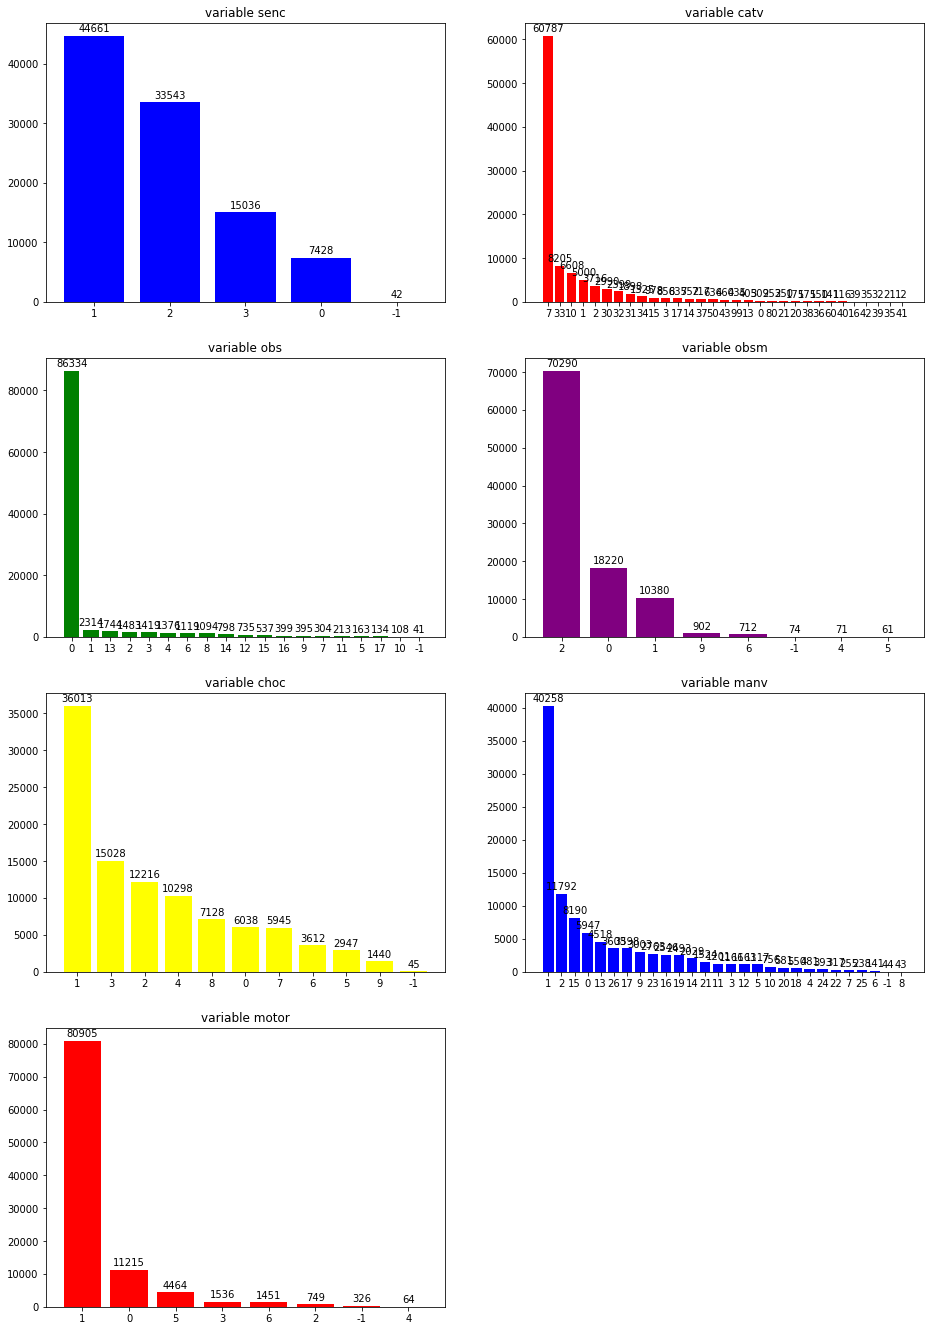

In [27]:
def cm_to_inch(value):
    return value/2.54

plt.figure(figsize=(cm_to_inch(40), cm_to_inch(60)));

def histo(variable, pos, couleur):

    xi = [str(x) for x in vehic[variable].value_counts().index.tolist()];
    yi = vehic[variable].value_counts().tolist();

    plt.subplot(4,2,pos);
    plt.bar(xi,yi, color=couleur);
    for x,y in zip(xi,yi): plt.annotate("{:.0f}".format(y),(x,y),textcoords="offset points",xytext=(0,4), ha='center')  
    plt.title("variable "+variable)

histo('senc', 1, 'blue')
histo('catv', 2, 'red')
histo('obs', 3, 'green')
histo('obsm', 4, 'purple')
histo('choc', 5, 'yellow')
histo('manv', 6, 'blue')
histo('motor', 7, 'red')

plt.show();

#### Suppression des variables de la table _obs_ (i.e obstacle immobile/fixe sur la route)

Au regard de l'histogramme la variable **_obs_** comporte beaucoup de valeurs **0** (i.e sans obstacle). On constate donc qu'il y a une sur-représentation de la valeur **0**, nous pouvons interpreter cela par le fait que la plupart des accidents se sont produits sans qu'il ait d'objets immobiles sur la route (arbres, glissière, véhicule en stationnement, mobilier urbain,...)

In [28]:
vehic.drop(['obs'], inplace=True, axis=1)

#### Transformation/recodage des variables suivantes pour le Dataframe _vehic_ :

- **_senc_** : Sens de circulation
- **_catv_** : Catégorie du véhicule
- **_obsm_** : Obstacle mobile heurté
- **_choc_** : Point de choc initial (avannt, arrière droit,...)
- **_manv_** : Manoeuvre principale avant l’accident (sans changement de direction, A contresens, Entre 2 files, même sens/file,...) 

#### On recode la variable _senc_ (i.e Sens de circulation)

Nous souhaitons connaître le sens de circulation des voitures impliqués juste avant un accident.

Pour ce faire, nous ré-encondons la variable **_senc_** de la manière suivante :

- Si **_senc_** = 1 alors la voiture roule dans le sens du numéro des adresses postales croissantes 

- Si **_senc_** = 2 alors la voiture roule dans le sens du numéro des adresses postales décroissantes

In [29]:
vehic.loc[vehic['senc'] == 1 , 'SenCir_AdrPost_Crois'] = 1
vehic.loc[vehic['senc'] != 1 , 'SenCir_AdrPost_Crois'] = 0
vehic['SenCir_AdrPost_Crois'] = vehic['SenCir_AdrPost_Crois'].astype(int)

vehic.loc[vehic['senc'] == 2 , 'SenCir_AdrPost_DeCrois'] = 1
vehic.loc[vehic['senc'] != 2 , 'SenCir_AdrPost_DeCrois'] = 0
vehic['SenCir_AdrPost_DeCrois'] = vehic['SenCir_AdrPost_DeCrois'].astype(int)

vehic.drop(['senc'], inplace=True, axis=1)

#### On recode la variable _catv_ (i.e Catégorie de véhicule)

Cette variable peut prendre énormément de valeurs différentes. Ainsi nous avons souhaités réduire le nombre de ces valeurs en créant les 3 types de catégories de véhicules: 

- **_vehic_lourd_** : Véhicules lourds (camion, bus, engin agricole,...)
- **_vehic_2roues_** : Véhicules 2 roues (moto, trotinette,...) 
- **_vehic_voiture_** : Véhicules 4 roues de type voiture



In [30]:
vehic.loc[(vehic['catv'] == 8) |
          (vehic['catv'] == 9) |
          (vehic['catv'] == 10) |
          (vehic['catv'] == 11) |
          (vehic['catv'] == 12) |
          (vehic['catv'] == 13) |
          (vehic['catv'] == 14) |
          (vehic['catv'] == 15) |
          (vehic['catv'] == 16) |
          (vehic['catv'] == 17) |
          (vehic['catv'] == 18) |
          (vehic['catv'] == 19) |
          (vehic['catv'] == 20) |
          (vehic['catv'] == 21) |
          (vehic['catv'] == 37) |
          (vehic['catv'] == 38) |
          (vehic['catv'] == 39) |
          (vehic['catv'] == 40) , 'vehic_lourd'] = 1
vehic.vehic_lourd = vehic.vehic_lourd.fillna(0)
vehic['vehic_lourd'] = vehic['vehic_lourd'].astype(int)

vehic.loc[(vehic['catv'] == 1) |
          (vehic['catv'] == 2) |
          (vehic['catv'] == 3) |
          (vehic['catv'] == 4) |
          (vehic['catv'] == 5) |
          (vehic['catv'] == 6) |
          (vehic['catv'] == 30) |
          (vehic['catv'] == 31) |
          (vehic['catv'] == 32) |
          (vehic['catv'] == 33) |
          (vehic['catv'] == 34) |
          (vehic['catv'] == 35) |
          (vehic['catv'] == 36) |
          (vehic['catv'] == 41) |
          (vehic['catv'] == 42) |
          (vehic['catv'] == 43) |
          (vehic['catv'] == 50) |
          (vehic['catv'] == 60) |
          (vehic['catv'] == 80) , 'vehic_2roues'] = 1
vehic.vehic_2roues = vehic.vehic_2roues.fillna(0)
vehic['vehic_2roues'] = vehic['vehic_2roues'].astype(int)

vehic.loc[vehic['catv'] == 7 , 'vehic_voiture'] = 1
vehic.vehic_voiture = vehic.vehic_voiture.fillna(0)
vehic['vehic_voiture'] = vehic['vehic_voiture'].astype(int)

vehic.drop(['catv'], inplace=True, axis=1)

In [31]:
vehic.loc[(vehic['obsm'] == 2) | (vehic['obsm'] == 4), 'obsm_vehicule'] = 1
vehic.obsm_vehicule = vehic.obsm_vehicule.fillna(0)
vehic['obsm_vehicule'] = vehic['obsm_vehicule'].astype(int)

vehic.loc[vehic['obsm'] == 1 , 'obsm_pieton'] = 1
vehic.obsm_pieton = vehic.obsm_pieton.fillna(0)
vehic['obsm_pieton'] = vehic['obsm_pieton'].astype(int)

vehic.loc[(vehic['obsm'] == 5) | (vehic['obsm'] == 6), 'obsm_animal'] = 1
vehic.obsm_animal = vehic.obsm_animal.fillna(0)
vehic['obsm_animal'] = vehic['obsm_animal'].astype(int)

vehic.drop(['obsm'], inplace=True, axis=1)

#### On recode la variable _choc_ (i.e Catégorie de véhicule)

Cette variable décrit le point de choc initiale entre l'ensemble des véhicules impliqués dans l'accident. Ainsi nous avons souhaités réduire le nombre de ces valeurs en créant les 3 types de catégories de véhicules:

- **_choc_avant_**
- **_choc_cote_** 
- **_choc_arriere_** 

In [32]:
vehic.loc[(vehic['choc'] == 1) |
          (vehic['choc'] == 2) |
          (vehic['choc'] == 3) , 'choc_avant'] = 1
vehic.choc_avant = vehic.choc_avant.fillna(0)
vehic['choc_avant'] = vehic['choc_avant'].astype(int)

vehic.loc[(vehic['choc'] == 4) |
          (vehic['choc'] == 5) |
          (vehic['choc'] == 6) , 'choc_arriere'] = 1
vehic.choc_arriere = vehic.choc_arriere.fillna(0)
vehic['choc_arriere'] = vehic['choc_arriere'].astype(int)

vehic.loc[(vehic['choc'] == 7) |
          (vehic['choc'] == 8) |
          (vehic['choc'] == 9) , 'choc_cote'] = 1
vehic.choc_cote = vehic.choc_cote.fillna(0)
vehic['choc_cote'] = vehic['choc_cote'].astype(int)

vehic.drop(['choc'], inplace=True, axis=1)

#### On recode la variable _manv_ (i.e Manoeuvre d'évitement)

Cette variable décrit la manoeuvre principale avant l’accident. Autrement dit, il s'agit de la dernière action engagé par le conducteur du véhicule pour éviter l'accident. Au regard de la distribution de cette variable nous réencondons la variable en une varialbe binaire indiquant si le véhicule à engagé ou non une manoeuvre d'évitement avant l'accident :

- **_manv_evitement_** => 0
- **_pas_manv_evitement_** => 1

In [33]:
vehic.loc[(vehic['manv'] == 1) | (vehic['manv'] == 2), 'pas_manv_evitement'] = 1
vehic.pas_manv_evitement = vehic.pas_manv_evitement.fillna(0)
vehic['pas_manv_evitement'] = vehic['pas_manv_evitement'].astype(int)

vehic.loc[(vehic['manv'] == 3) |
          (vehic['manv'] == 4) |
          (vehic['manv'] == 5) |
          (vehic['manv'] == 6) |
          (vehic['manv'] == 7) |
          (vehic['manv'] == 8) |
          (vehic['manv'] == 9) |
          (vehic['manv'] == 10) |
          (vehic['manv'] == 11) |
          (vehic['manv'] == 12) |
          (vehic['manv'] == 13) |
          (vehic['manv'] == 14) |
          (vehic['manv'] == 15) |
          (vehic['manv'] == 16) |
          (vehic['manv'] == 17) |
          (vehic['manv'] == 18) |
          (vehic['manv'] == 19) |
          (vehic['manv'] == 20) |
          (vehic['manv'] == 21) |
          (vehic['manv'] == 22) |
          (vehic['manv'] == 23) |
          (vehic['manv'] == 24) |
          (vehic['manv'] == 25) |
          (vehic['manv'] == 26) , 'manv_evitement'] = 1
vehic.manv_evitement = vehic.manv_evitement.fillna(0)
vehic['manv_evitement'] = vehic['manv_evitement'].astype(int)

vehic.drop(['manv'], inplace=True, axis=1)

#### On recode la variable _motor_

Cette variable décrit type de motorisation du véhicule (Hydrocarbures, Electrique,...). Il s'agit d'une variable pas très inréssante, parce que quasiment toutes les voitures fonctionnent à l'hydrocarbure (cf histogramme). On retire cette variale de notre jeu de données

In [34]:
vehic.drop(['motor'], inplace=True, axis=1)

## Sommons (avec un group by) chaques lignes pour obtenir les mêmes dimensions que les tables _carac_ et _lieux_ grâce à la variable Num_Acc<br> Soit 58840 lignes


In [35]:
vehic = vehic.groupby(by=['Num_Acc']).sum()
vehic = vehic.reset_index()

In [36]:
print("Maintenant il y ",vehic.shape[0],"lignes et ",vehic.shape[1],"colonnes dans la table vehic")

Maintenant il y  58840 lignes et  14 colonnes dans la table vehic


### Transformation des variables

- _SenCir_AdrPost_Crois 
- _SenCir_AdrPost_DeCrois

### Regardons si les véhicules avaient le même sens de circulation lors de l'accident 

In [37]:
vehic.loc[(vehic['SenCir_AdrPost_Crois'] > 0) & (vehic['SenCir_AdrPost_DeCrois']  > 0), 'Sens_Circu_Identique'] = 0
vehic.Sens_Circu_Identique = vehic.Sens_Circu_Identique.fillna(1)
vehic['Sens_Circu_Identique'] = vehic['Sens_Circu_Identique'].astype(int)

vehic.drop(['SenCir_AdrPost_Crois'], inplace=True, axis=1)
vehic.drop(['SenCir_AdrPost_DeCrois'], inplace=True, axis=1)

### Fin du pré-traitement du Dataframe _vehic_

### Début du pré-traitement du Dataframe _carac_

####  On visualise la table _carac_

In [38]:
carac.head(5)

,Num_Acc,jour,mois,an,hrmn,lum,dep,com,agg,int,atm,col,adr,lat,long
0,201900000001,30,11,2019,01:30,4,93,93053,1,1,1,2,AUTOROUTE A3,"48,8962100","2,4701200"
1,201900000002,30,11,2019,02:50,3,93,93066,1,1,1,6,AUTOROUTE A1,"48,9307000","2,3688000"
2,201900000003,28,11,2019,15:15,1,92,92036,1,1,1,4,AUTOROUTE A86,"48,9358718","2,3191744"
3,201900000004,30,11,2019,20:20,5,94,94069,1,1,1,4,A4,"48,8173295","2,4281502"
4,201900000005,30,11,2019,04:00,3,94,94028,1,1,1,2,A86 INT,"48,7763620","2,4332540"


#### Analyse du nombre de valeur manquante avant traitement de la table _carac_

In [39]:
for i in carac.columns.tolist():
    print("")
    print("Il y a",carac[i].isnull().sum(axis = 0),"valeurs manquantes dans la variable",i,"(soit",round(carac[i].isnull().sum(axis = 0)/58840,4)*100,"%) ")


Il y a 0 valeurs manquantes dans la variable Num_Acc (soit 0.0 %) 

Il y a 0 valeurs manquantes dans la variable jour (soit 0.0 %) 

Il y a 0 valeurs manquantes dans la variable mois (soit 0.0 %) 

Il y a 0 valeurs manquantes dans la variable an (soit 0.0 %) 

Il y a 0 valeurs manquantes dans la variable hrmn (soit 0.0 %) 

Il y a 0 valeurs manquantes dans la variable lum (soit 0.0 %) 

Il y a 0 valeurs manquantes dans la variable dep (soit 0.0 %) 

Il y a 0 valeurs manquantes dans la variable com (soit 0.0 %) 

Il y a 0 valeurs manquantes dans la variable agg (soit 0.0 %) 

Il y a 0 valeurs manquantes dans la variable int (soit 0.0 %) 

Il y a 0 valeurs manquantes dans la variable atm (soit 0.0 %) 

Il y a 0 valeurs manquantes dans la variable col (soit 0.0 %) 

Il y a 427 valeurs manquantes dans la variable adr (soit 0.73 %) 

Il y a 0 valeurs manquantes dans la variable lat (soit 0.0 %) 

Il y a 0 valeurs manquantes dans la variable long (soit 0.0 %) 


#### La variable _adr_ contient 427 NaN. Il convient de remplacer ces NaN par une chaine de caractères vide.

In [40]:
carac.ard = carac.adr.fillna("")

<ipython-input-40-6f3f8623afe9>:1: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  carac.ard = carac.adr.fillna("")


### Suppression des variables inutiles dans le cadre de notre analyse

#### Suppresion des variables _jour_ , _mois_ , _an_ , _hrmm_ . La variable _lum_ nous renseigne déjà si l'accident s'est passé la nuit ou le jour

In [41]:
carac.drop(['jour'], inplace=True, axis=1)
carac.drop(['mois'], inplace=True, axis=1)
carac.drop(['an'], inplace=True, axis=1)
carac.drop(['hrmn'], inplace=True, axis=1)

#### Les variables liées à la localisation de l'accident sont inutiles dans le cadre de notre étude. Par conséquent, les variabes _adr_ , _lat_ , _long_ sont retirées de notre jeu de données

In [42]:
carac.drop(['adr'], inplace=True, axis=1)
carac.drop(['lat'], inplace=True, axis=1)
carac.drop(['long'], inplace=True, axis=1)

### On visualise le DataFrame _carac_ nettoyé

In [43]:
carac

,Num_Acc,lum,dep,com,agg,int,atm,col
0,201900000001,4,93,93053,1,1,1,2
1,201900000002,3,93,93066,1,1,1,6
2,201900000003,1,92,92036,1,1,1,4
3,201900000004,5,94,94069,1,1,1,4
4,201900000005,3,94,94028,1,1,1,2
...,...,...,...,...,...,...,...,...
58835,201900058836,1,69,69288,1,1,5,2
58836,201900058837,1,67,67482,1,1,8,4
58837,201900058838,4,94,94021,1,1,1,6
58838,201900058839,1,78,78640,1,1,1,7


### Importations d'une table de correspondance "numero_departement_region" pour identifier les région française

### Début du pré-traitement de la table de correspondance

In [44]:
numero_departement_region = pd.read_csv('dataset/numero_departement_region.csv', sep=';')

#### Gestion des valeurs manquantes pour les colonnes _numero_departement_region_ pour <br> les variables _liste_region_ _num_liste_region_ : 

- Pour la colonne _liste_region_ on complète les valeurs manquantes par des une chaine de caractère vide
- Pour la colonne _num_liste_region_ on complète les valeurs manquantes par la valeur 0 puis en converti les valeurs de la colonne en entier

In [45]:
numero_departement_region.liste_region = numero_departement_region.liste_region.fillna("")

numero_departement_region.num_liste_region = numero_departement_region.num_liste_region.fillna(0)

numero_departement_region['num_liste_region'] = numero_departement_region['num_liste_region'].astype(int)

#### On visualise le DataFrame

In [46]:
numero_departement_region.head(20)

,dep,departement,region,num_region,zone_dep,liste_region,num_liste_region,zone
0,1,Ain,Auvergne-Rhône-Alpes,1,SE,Auvergne-Rhône-Alpes,1,SE
1,2,Aisne,Hauts-de-France,9,NE,Bourgogne-Franche-Comté,2,NE
2,3,Allier,Auvergne-Rhône-Alpes,1,SE,Bretagne,3,NO
3,4,Alpes-de-Haute-Provence,Provence-Alpes-Côte d'Azur,18,SE,Centre-Val de Loire,4,NO
4,5,Hautes-Alpes,Provence-Alpes-Côte d'Azur,18,SE,Corse,5,SE
5,6,Alpes-Maritimes,Provence-Alpes-Côte d'Azur,18,SE,Grand Est,6,NE
6,7,Ardèche,Auvergne-Rhône-Alpes,1,SE,Guadeloupe,7,OM
7,8,Ardennes,Grand Est,6,NE,Guyane,8,OM
8,9,Ariège,Occitanie,16,SO,Hauts-de-France,9,NE
9,10,Aube,Grand Est,6,NE,Île-de-France,10,IDF


#### On conserve les colonnes _dep_ et _zone_dep_ qui seront ajoutées au DataFrame _Carac_

In [47]:
correspondance  = numero_departement_region[['dep','zone_dep']]

### Fin du pré-traitement de la table de correspondance

#### On réalise la jointure entre le DataFrame _Carac_ et _Numero_Departement_Region_ en prenant comme référence la colonne _dep_

In [48]:
A = carac.merge(correspondance, on='dep', how='left')
carac = A.copy()

### Début du pré-traitement de la table de _carac_

#### Après la jointure, les variables ne seront pas gardés. Par conséquent nous supprimons les variables _Dep_ et _Com_ 

In [49]:
carac.drop(['dep','com'], inplace=True, axis=1)

### Statistiques Descriptives, Histogrammes des variables de la table _carac_

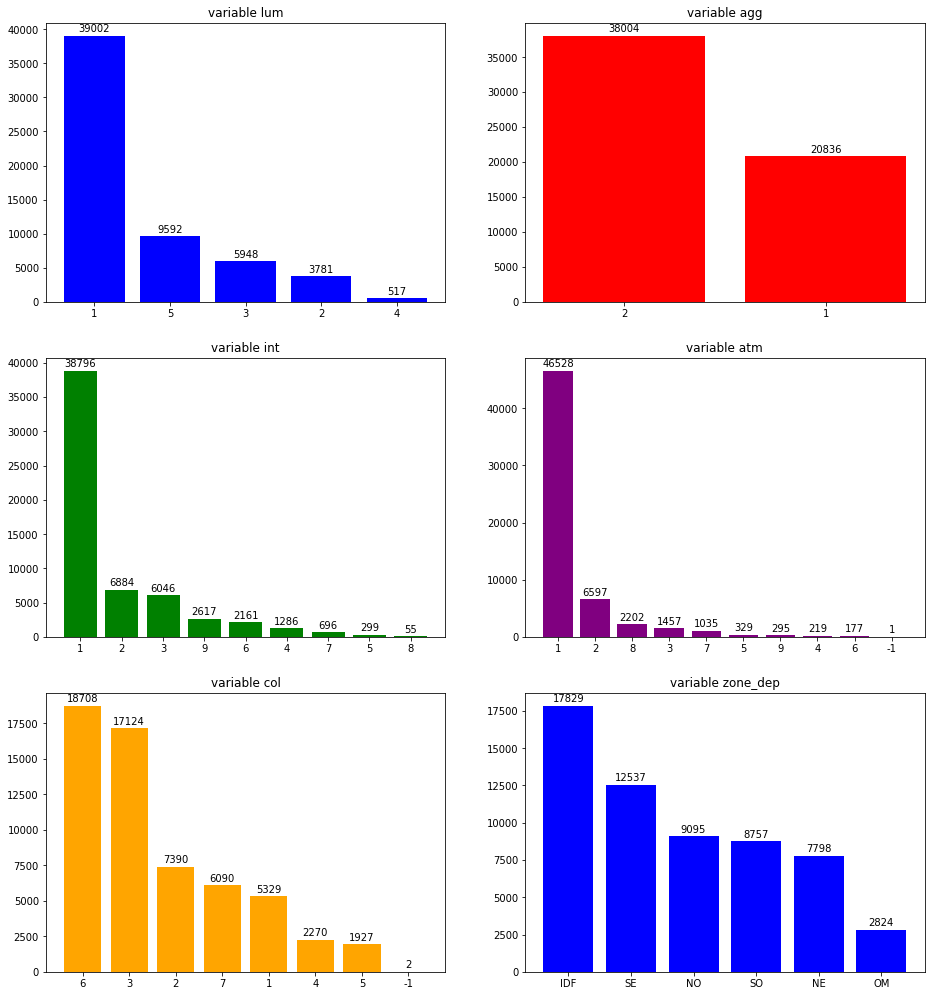

In [50]:
def cm_to_inch(value):
    return value/2.54

plt.figure(figsize=(cm_to_inch(40), cm_to_inch(60)));

def histo(variable, pos, couleur):

    xi = [str(x) for x in carac[variable].value_counts().index.tolist()];
    yi = carac[variable].value_counts().tolist();

    plt.subplot(4,2,pos);
    plt.bar(xi,yi, color=couleur);
    for x,y in zip(xi,yi): plt.annotate("{:.0f}".format(y),(x,y),textcoords="offset points",xytext=(0,4), ha='center')  
    plt.title("variable "+variable)

histo('lum', 1, 'blue')
histo('agg', 2, 'red')
histo('int', 3, 'green')
histo('atm', 4, 'purple')
histo('col', 5, 'orange')
histo('zone_dep', 6, 'blue')

plt.show();

#### Après visualisation des histogrammes apportons des modifications à nos données

#### transformation binaire de la variable _agg_ en variable binaire comme suit :
- 1 pour la valeur agglomération 
- 0 sinon

In [51]:
carac.loc[carac['agg'] == 1, 'agg'] = 0
carac.loc[carac['agg'] == 2, 'agg'] = 1
carac['agg'] = carac['agg'].astype(int)

#### transformation de la variable _lum_ en variable binaire comme suit :
- 1 pour la valeur jour 
- 0 sinon

In [52]:
carac.loc[carac['lum'] != 1, 'lum'] = 0
carac['lum'] = carac['lum'].astype(int)

#### transformation de la variable _int_ en variable binaire comme suit :
- 1 pour la valeur hors intersection 
- 0 sinon

In [53]:
carac.loc[carac['int'] != 1, 'int'] = 0
carac['int'] = carac['int'].astype(int)

#### transformation de la variable _atm_ en variable binaire comme suit :
- 1 pour la valeur temps normal 
- 0 sinon

In [54]:
carac.loc[carac['atm'] != 1, 'atm'] = 0
carac['atm'] = carac['atm'].astype(int)

#### transformation de la variable _col_ en variable binaire comme suit :
- 1 pour la valeur collision entre véhicules
- 0 sinon

In [55]:
carac.loc[(carac['col'] == 1) |
          (carac['col'] == 2) |
          (carac['col'] == 3) |
          (carac['col'] == 4) |
          (carac['col'] == 5) , 'col'] = 1
carac.loc[carac['col'] != 1, 'col'] = 0
carac['col'] = carac['col'].astype(int)

#### création des variables reg_N , reg_S, reg_OM, reg_IDF à partir de la variable _zone_dep_

In [56]:
carac.loc[(carac.zone_dep == 'NO') | (carac.zone_dep == 'NE'), 'reg_N'] = 1
carac['reg_N'] = carac['reg_N'].fillna(0)
carac['reg_N'] = carac['reg_N'].astype(int)

carac.loc[(carac.zone_dep == 'SO') | (carac.zone_dep == 'SE'), 'reg_S'] = 1
carac['reg_S'] = carac['reg_S'].fillna(0)
carac['reg_S'] = carac['reg_S'].astype(int)

carac.loc[carac.zone_dep == 'OM', 'reg_OM'] = 1
carac['reg_OM'] = carac['reg_OM'].fillna(0)
carac['reg_OM'] = carac['reg_OM'].astype(int)

carac.loc[carac.zone_dep == 'IDF', 'reg_IDF'] = 1
carac['reg_IDF'] = carac['reg_IDF'].fillna(0)
carac['reg_IDF'] = carac['reg_IDF'].astype(int)

carac.drop(['zone_dep'], inplace=True, axis=1)

### Fin pré-traitement du DataFrame _carac_

### Début pré-traitement du DataFrame _lieux_

#### Analyse du nombre de valeurs maquantes avant traitement de la table _lieux_

In [57]:
for i in lieux.columns.tolist():
    print("")
    print("Il y a",lieux[i].isnull().sum(axis = 0),"valeurs manquantes dans la variable",i,"(soit",round(lieux[i].isnull().sum(axis = 0)/58840,4)*100,"%) ")


Il y a 0 valeurs manquantes dans la variable Num_Acc (soit 0.0 %) 

Il y a 0 valeurs manquantes dans la variable catr (soit 0.0 %) 

Il y a 2935 valeurs manquantes dans la variable voie (soit 4.99 %) 

Il y a 10746 valeurs manquantes dans la variable v1 (soit 18.26 %) 

Il y a 54673 valeurs manquantes dans la variable v2 (soit 92.92 %) 

Il y a 0 valeurs manquantes dans la variable circ (soit 0.0 %) 

Il y a 0 valeurs manquantes dans la variable nbv (soit 0.0 %) 

Il y a 0 valeurs manquantes dans la variable vosp (soit 0.0 %) 

Il y a 0 valeurs manquantes dans la variable prof (soit 0.0 %) 

Il y a 0 valeurs manquantes dans la variable pr (soit 0.0 %) 

Il y a 0 valeurs manquantes dans la variable pr1 (soit 0.0 %) 

Il y a 0 valeurs manquantes dans la variable plan (soit 0.0 %) 

Il y a 58629 valeurs manquantes dans la variable lartpc (soit 99.64 %) 

Il y a 58468 valeurs manquantes dans la variable larrout (soit 99.37 %) 

Il y a 0 valeurs manquantes dans la variable surf (soit 0.0 %

#### Au regard des valeurs manquantes ci-dessus supprimons les variables suivantes _v2_, _lartpc_, _larrout_,  la table _lieux_ :

In [58]:
lieux.drop(['v2'], inplace=True, axis=1)
lieux.drop(['lartpc'], inplace=True, axis=1)
lieux.drop(['larrout'], inplace=True, axis=1)

### Réalisation d'une sélection de variables la table _lieux_

#### La variable _voie_ : numero de route <br> <br> du fait que cette variable possède beaucoup de valeurs manquantes, cette variable devient inintéressant

In [59]:
lieux['voie'].unique().tolist()

['3',
 '1',
 '86',
 '4',
 '86 ',
 'FOCH (RUE DU MARECHAL)',
 'BEAUJOLAIS (avenue du)',
 'VICTOR HUGO(RUE)',
 '986 ',
 'LOUIS SALVATOR (BOULEVARD)',
 'BAILLE (BOULEVARD)',
 '104',
 '173',
 '2',
 'COMMUNE DE PARIS (AVENUE)',
 'GENERAL BROSSET (DU)                (AV)',
 'GABARES (RUE DES)',
 '6',
 'PAUL SEDAILLIAN                     (QU)',
 'KITCHENER MARCHAND                  (PT)',
 '81',
 '646',
 'PHILIPINES - CHEMIN DES',
 'HENRI BARBUSSE (RUE)',
 'CATHELIN DR (BOULEVARD DU)',
 '147 ',
 'LIBERATION (AVENUE DE LA)',
 'LICES (AVE DES)',
 'ROGER DUMOULIN (AVENUE)',
 '321',
 '308',
 'ROSE (BD.JEAN)',
 'BOLLEE (AV) N° PAIRS 224 ET >',
 '601',
 '306',
 'JEAN JAURES (AVENUE)',
 'MOULIN (PLACE JEAN)',
 'QUATRE-SAISONS (DES)',
 '945',
 'FRANCOIS MITTERAND',
 'NOTRE DAME DU THIL (RUE)',
 'AVENUE JEAN JAURES',
 'ALLEE JACQUES SIMON',
 'RUE DE TAISSY',
 'ALLEE VOLTAIRE',
 'SAINT PAUL (RUE)',
 'CALIGNY (QUAI DE)',
 'TURPIN DE CRISSE AVENUE',
 'RUE MARCELIN BERTHELOT',
 ' RUE DES MONTEES',
 '524'

In [60]:
print('il y a',len(lieux['voie'].unique().tolist()),'valeur différentes dans la variable voie')

il y a 14493 valeur différentes dans la variable voie


In [61]:
lieux.drop(['voie'], inplace=True, axis=1)

#### La variable _v1_: Indice numérique du numéro de route (exemple : 2 bis, 3 ter etc.) <br> <br> cette variable n'est pas  intéressante, elle est composée d'un trop grand nombre de valeur 0.0

In [62]:
lieux['v1'].value_counts()

0.0    47895
2.0      176
3.0       23
Name: v1, dtype: int64

In [63]:
lieux.drop(['v1'], inplace=True, axis=1)

#### La variable _pr_ : Numéro du PR de rattachement (numéro de la borne amont). La valeur -1 signifie que le PR n’est pas renseigné. <br> <br> La variable prend un grand nombre de valeurs différentes. De plus elle est difficilement compréhensible par conséquent cette dernière n'est pas intéressante pour notre étude

In [64]:
lieux['pr'].value_counts()

0       27114
(1)      7297
1        3508
2        1129
3         935
        ...  
460         1
3800        1
439         1
5620        1
433         1
Name: pr, Length: 489, dtype: int64

In [65]:
lieux.drop(['pr'], inplace=True, axis=1)

#### la variable _pr1_ : Distance en mètres au PR (par rapport à la borne amont). La valeur -1 signifie que le PR n’est pas renseigné. <br> <br> La variable prend un grand nombre de valeurs différentes ; de plus elle est difficilement compréhensible ; elle n'est pas intéressante pour notre étude

In [66]:
lieux['pr1'].value_counts()

0       30306
(1)      7599
500      2050
200      1135
800      1084
        ...  
334         1
2297        1
717         1
122         1
2287        1
Name: pr1, Length: 1103, dtype: int64

In [67]:
lieux.drop(['pr1'], inplace=True, axis=1)

### Statistiques Descriptives, Histogrammes des variables de la table _lieux_

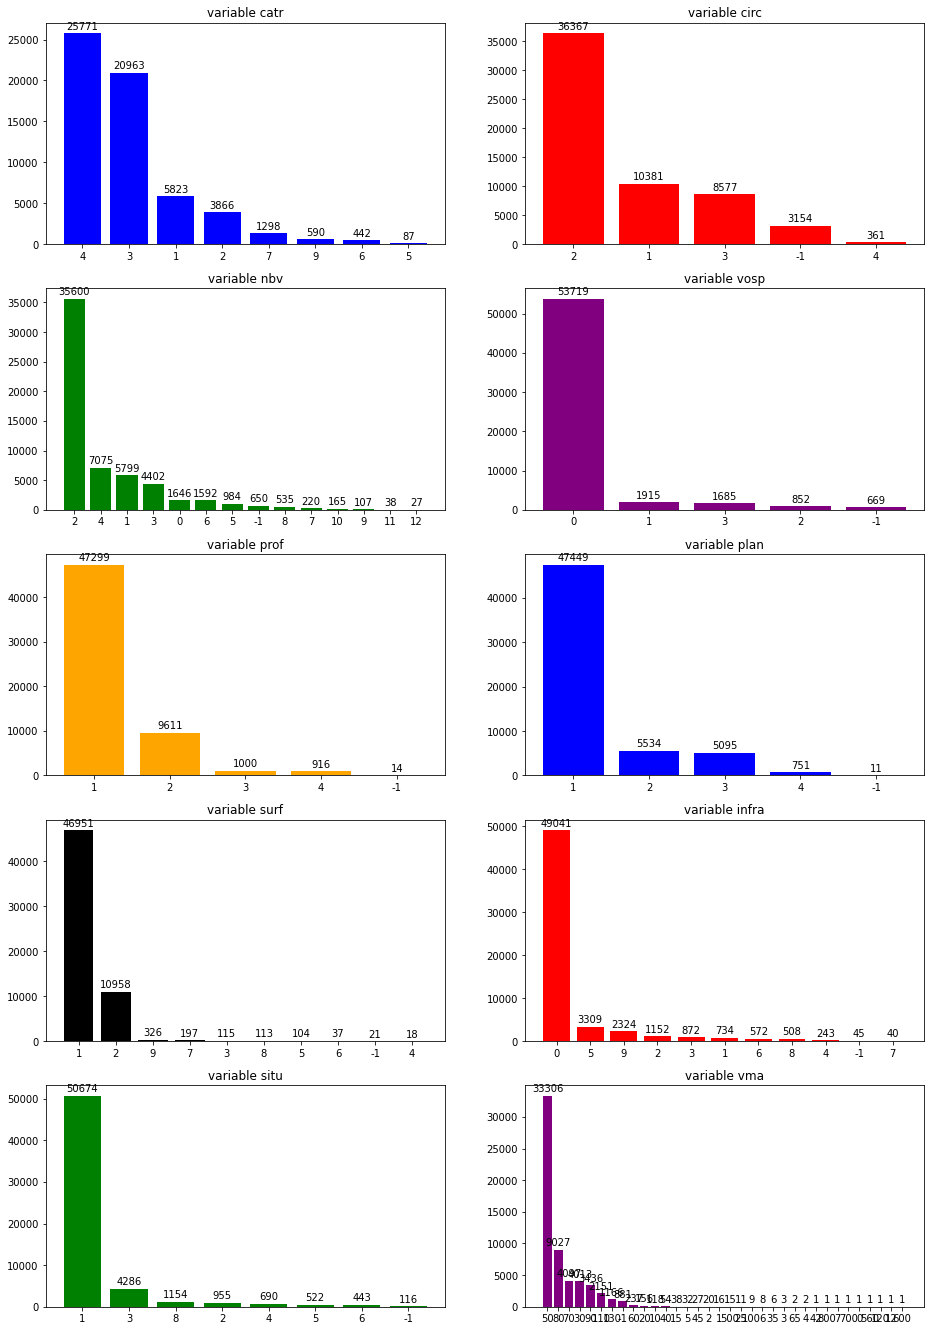

In [68]:
def cm_to_inch(value):
    return value/2.54

plt.figure(figsize=(cm_to_inch(40), cm_to_inch(60)));

def histo(variable, pos, couleur):

    xi = [str(x) for x in lieux[variable].value_counts().index.tolist()];
    yi = lieux[variable].value_counts().tolist();

    plt.subplot(5,2,pos);
    plt.bar(xi,yi, color=couleur);
    for x,y in zip(xi,yi): plt.annotate("{:.0f}".format(y),(x,y),textcoords="offset points",xytext=(0,4), ha='center')  
    plt.title("variable "+variable)

histo('catr', 1, 'blue')
histo('circ', 2, 'red')
histo('nbv', 3, 'green')
histo('vosp', 4, 'purple')
histo('prof', 5, 'orange')
histo('plan', 6, 'blue')
histo('surf', 7, 'black')
histo('infra', 8, 'red')
histo('situ', 9, 'green')
histo('vma', 10, 'purple')

plt.show();

### Au regard des histogrammes, certaine variable on des valeurs sur-représentées, ces variables ne nous intéresserons pas. <br> cela concerne entre autre les variables: <br>
- **_vosp_** , Signale l’existence d’une voie réservée, indépendamment du fait que l’accident ait lieu ou non sur cette voie. <br> la valeur 0 est sur-représenté : l'absence de voie réservée <br> <br>
- **_infra_** , Aménagement et Infrastructure : Souterrain, tunnel, Voie ferrée, ... <br> la valeur 0 est sur-représenté : Aucun <br> <br>
- **_situ_** , Situation de l’accident : Sur chaussée, Sur accotement, ... <br> la valeur 1 est sur-représenté : Sur chaussée <br> <br>
- **_plan_** , Tracé en plan : En courbe à gauche, En courbe à droite, En « S », ... <br> la valeur 1 est sur-représenté : Partie rectiligne <br> <br>

In [69]:
lieux.drop(['vosp'], inplace=True, axis=1)
lieux.drop(['infra'], inplace=True, axis=1)
lieux.drop(['situ'], inplace=True, axis=1)
lieux.drop(['plan'], inplace=True, axis=1)

#### Pour chaque type de route de la variable _catr_ créons une nouvelle variable, grâce à la méthode du One-Hot Encoding

In [70]:
lieux.loc[lieux['catr'] == 1, 'catr'] = 'autoroute'
lieux.loc[lieux['catr'] == 2, 'catr'] = 'route_nationale'
lieux.loc[lieux['catr'] == 3, 'catr'] = 'route_departementale'
lieux.loc[lieux['catr'] == 4, 'catr'] = 'voie_communales'
lieux.loc[lieux['catr'] == 5, 'catr'] = 'hors_reseau_public'
lieux.loc[lieux['catr'] == 6, 'catr'] = 'parc_de_stationnement'
lieux.loc[lieux['catr'] == 7, 'catr'] = 'routes_de_metropole'
lieux.loc[lieux['catr'] == 9, 'catr'] = 'autre'

In [71]:
y = pd.get_dummies(lieux['catr'])

# supprimons le type de route "autre"
y.drop(['hors_reseau_public'], inplace=True, axis=1)
y.drop(['parc_de_stationnement'], inplace=True, axis=1)
y.drop(['routes_de_metropole'], inplace=True, axis=1)
y.drop(['autre'], inplace=True, axis=1)

y

,autoroute,route_departementale,route_nationale,voie_communales
0,1,0,0,0
1,1,0,0,0
2,1,0,0,0
3,1,0,0,0
4,1,0,0,0
...,...,...,...,...
58835,1,0,0,0
58836,1,0,0,0
58837,1,0,0,0
58838,1,0,0,0


#### Ajoutons ces nouvelles colonnes à notre table _lieux_ et supprimons la variable _catr_

In [72]:
lieux.drop(['catr'], inplace=True, axis=1)
lieux = lieux.join(y)

#### Pour chaque type de circulation de la variable _circ_ créons une nouvelle variable, grâce à la méthode du One-Hot Encoding

In [73]:
lieux.loc[lieux['circ'] == -1, 'circ'] = 'circ_non_renseigne'
lieux.loc[lieux['circ'] == 1, 'circ'] = 'circ_a_sens_unique'
lieux.loc[lieux['circ'] == 2, 'circ'] = 'circ_bidirectionnelle'
lieux.loc[lieux['circ'] == 3, 'circ'] = 'circ_a_chaussees_separees'
lieux.loc[lieux['circ'] == 4, 'circ'] = 'voies_a_affectation_variable'

In [74]:
y = pd.get_dummies(lieux['circ'])

# supprimons le type de route "non_renseigne"
# supprimons le type de route "voies_a_affectation_variable"
# car peu représenté
y.drop(['circ_non_renseigne'], inplace=True, axis=1)
y.drop(['voies_a_affectation_variable'], inplace=True, axis=1)

y

,circ_a_chaussees_separees,circ_a_sens_unique,circ_bidirectionnelle
0,1,0,0
1,0,1,0
2,1,0,0
3,1,0,0
4,0,1,0
...,...,...,...
58835,0,1,0
58836,0,1,0
58837,1,0,0
58838,0,1,0


#### Ajoutons ces nouvelles colonnes à notre table _lieux_ et supprimons la variable _circ_

In [75]:
lieux.drop(['circ'], inplace=True, axis=1)
lieux = lieux.join(y)

#### Transformation de la variable _nbv_ en  variable binaire 
- 1 pour la valeur "entre zéro et deux voies" 
- 0 sinon

In [76]:
lieux.loc[(lieux['nbv'] == 0) |
          (lieux['nbv'] == 1) |
          (lieux['nbv'] == 2), 'nbv'] = 1
lieux.loc[lieux['nbv'] != 1, 'nbv'] = 0
lieux['nbv'] = lieux['nbv'].astype(int)

#### Transformation de la variable _prof_
- 1 pour la valeur "route en pente" 
- 0 sinon

In [77]:
lieux.loc[lieux['prof'] == 1, 'prof'] = 0
lieux.loc[(lieux['prof'] == 2) |
          (lieux['prof'] == 3) |
          (lieux['prof'] == 4), 'prof'] = 1
lieux.loc[lieux['prof'] != 1, 'prof'] = 0
lieux['prof'] = lieux['prof'].astype(int)

#### Transformation de la variable _surf_ en 1 : "mauvaise condition météo" et 0 sinon

In [78]:
lieux.loc[lieux['surf'] == 1, 'surf'] = 0
lieux.loc[lieux['surf'] != 0, 'surf'] = 1
lieux['surf'] = lieux['surf'].astype(int)

#### Transformation de la variable _vma_ en variable catégorielle comme suit :
- [0km, 50km]
- [50km, 90km]
- [90km, 130km]
- [130km, ++]

In [79]:
lieux.loc[lieux['vma'] <= 50 , 'vma_moins_de_50'] = 1
lieux['vma_moins_de_50'] = lieux['vma_moins_de_50'].fillna(0)
lieux['vma_moins_de_50'] = lieux['vma_moins_de_50'].astype(int)

lieux.loc[(lieux['vma'] > 50) & (lieux['vma'] <= 90) , 'vma_50_90'] = 1
lieux['vma_50_90'] = lieux['vma_50_90'].fillna(0)
lieux['vma_50_90'] = lieux['vma_50_90'].astype(int)

lieux.loc[(lieux['vma'] > 90) & (lieux['vma'] <= 110) , 'vma_90_110'] = 1
lieux['vma_90_110'] = lieux['vma_90_110'].fillna(0)
lieux['vma_90_110'] = lieux['vma_90_110'].astype(int)

lieux.loc[(lieux['vma'] > 110) & (lieux['vma'] <= 130) , 'vma_110_130'] = 1
lieux['vma_110_130'] = lieux['vma_110_130'].fillna(0)
lieux['vma_110_130'] = lieux['vma_110_130'].astype(int)

lieux.loc[lieux['vma'] > 130 , 'vma_plus_de_130'] = 1
lieux['vma_plus_de_130'] = lieux['vma_plus_de_130'].fillna(0)
lieux['vma_plus_de_130'] = lieux['vma_plus_de_130'].astype(int)

lieux.drop(['vma'], inplace=True, axis=1)

### Fin pré-traitement du DataFrame _lieux_

 #### On visualise le DataFrame _lieux_

In [80]:
lieux

,Num_Acc,nbv,prof,surf,autoroute,route_departementale,route_nationale,voie_communales,circ_a_chaussees_separees,circ_a_sens_unique,circ_bidirectionnelle,vma_moins_de_50,vma_50_90,vma_90_110,vma_110_130,vma_plus_de_130
0,201900000001,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0
1,201900000002,1,1,0,1,0,0,0,0,1,0,0,1,0,0,0
2,201900000003,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0
3,201900000004,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0
4,201900000005,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
58835,201900058836,0,0,1,1,0,0,0,0,1,0,0,0,0,1,0
58836,201900058837,1,0,1,1,0,0,0,0,1,0,0,1,0,0,0
58837,201900058838,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0
58838,201900058839,1,0,0,1,0,0,0,0,1,0,1,0,0,0,0


### Visualisation des dimensions des tables en vue d'une jointure des tables :
- vehic
- usag
- carac
- lieux

In [81]:
print("Dimension de la table vehic : ", vehic.shape)
print("Dimension de la table usag : ", usag.shape)
print("Dimension de la table vehic : ", carac.shape)
print("Dimension de la table vehic : ", lieux.shape)

Dimension de la table vehic :  (58840, 13)
Dimension de la table usag :  (58840, 11)
Dimension de la table vehic :  (58840, 10)
Dimension de la table vehic :  (58840, 16)


#### Les 4 Dataframes possèdent bien le même nombre de lignes. Par conséquent nous pouvons joindre ces 4 DataFrames pour ne former qu'un DataFrame. 

## On effectue une jointure des 4 tables en prenant comme référence la variable _Num_Acc_

In [82]:
accident = lieux.merge(carac, on='Num_Acc', how='left').merge(usag, on='Num_Acc', how='left').merge(vehic, on='Num_Acc', how='left')

## Visualisation du DataFrame _Accident_

In [83]:
accident

,Num_Acc,nbv,prof,surf,autoroute,route_departementale,route_nationale,voie_communales,circ_a_chaussees_separees,circ_a_sens_unique,...,vehic_voiture,obsm_vehicule,obsm_pieton,obsm_animal,choc_avant,choc_arriere,choc_cote,pas_manv_evitement,manv_evitement,Sens_Circu_Identique
0,201900000001,0,0,0,1,0,0,0,1,0,...,1,1,0,0,1,1,0,0,2,1
1,201900000002,1,1,0,1,0,0,0,0,1,...,1,0,0,0,1,0,0,0,0,1
2,201900000003,0,0,0,1,0,0,0,1,0,...,3,2,0,0,1,2,0,2,1,1
3,201900000004,0,0,0,1,0,0,0,1,0,...,3,3,0,0,1,2,0,1,2,1
4,201900000005,0,0,0,1,0,0,0,0,1,...,2,2,0,0,0,2,0,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
58835,201900058836,0,0,1,1,0,0,0,0,1,...,2,2,0,0,1,1,0,0,1,1
58836,201900058837,1,0,1,1,0,0,0,0,1,...,3,3,0,0,2,1,0,3,0,1
58837,201900058838,0,0,0,1,0,0,0,1,0,...,1,0,0,0,1,0,0,0,1,1
58838,201900058839,1,0,0,1,0,0,0,0,1,...,0,0,0,0,0,0,1,1,0,1


In [84]:
accident.columns

Index(['Num_Acc', 'nbv', 'prof', 'surf', 'autoroute', 'route_departementale',
       'route_nationale', 'voie_communales', 'circ_a_chaussees_separees',
       'circ_a_sens_unique', 'circ_bidirectionnelle', 'vma_moins_de_50',
       'vma_50_90', 'vma_90_110', 'vma_110_130', 'vma_plus_de_130', 'lum',
       'agg', 'int', 'atm', 'col', 'reg_N', 'reg_S', 'reg_OM', 'reg_IDF',
       'passager', 'conducteur', 'piéton', 'promenade_loisir',
       'grave_ou_decede', 'mineur', 'adulte', 'senior', 'senior_plus', 'secu',
       'vehic_lourd', 'vehic_2roues', 'vehic_voiture', 'obsm_vehicule',
       'obsm_pieton', 'obsm_animal', 'choc_avant', 'choc_arriere', 'choc_cote',
       'pas_manv_evitement', 'manv_evitement', 'Sens_Circu_Identique'],
      dtype='object')